In [10]:
import matplotlib.pyplot as plt
import os
import numpy as np
from PIL import Image
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras

def load_data(data_dir, target_size=(224, 224)):
    X = []
    y = []

    for folder_name in os.listdir(data_dir):
        folder_path = os.path.join(data_dir, folder_name)
        if os.path.isdir(folder_path):
            for file_name in os.listdir(folder_path):
                file_path = os.path.join(folder_path, file_name)
                image = Image.open(file_path).convert('RGB')
                resized_image = image.resize(target_size)
                X.append(np.array(resized_image))
                y.append(folder_name)

    return np.array(X), np.array(y)


## Data for both freshness and type of fruit

In [1]:
# Step 1: Download the dataset from Kaggle and unzip the file

# Step 2: Load the images and labels
data_dir = r'C:\Users\Ming\Desktop\School\Data_Science\Advanced_DS\Project\Fruits_Vegetables_Dataset'
X, y = load_data(data_dir)

# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=249, stratify=y_test)

# Step 4: Encode the labels
label_encoder = LabelEncoder()

label_encoder1 = LabelEncoder()
label_encoder1.fit(y_test)

y_train_encoded1 = label_encoder.fit_transform(y_train)
y_test_encoded1 = label_encoder.fit_transform(y_test)
y_val_encoded1 = label_encoder.fit_transform(y_val)

# Step 5: Define image transformations for standardization and data augmentation
image_size = X_train.shape[1:]

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1
)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

train_fresh_f_and_v_generator = train_datagen.flow(X_train, y_train_encoded1, batch_size=64)
test_fresh_f_and_v_generator = test_datagen.flow(X_test, y_test_encoded1, batch_size=64)
val_fresh_f_and_v_generator = val_datagen.flow(X_val, y_val_encoded1, batch_size=64)


c:\Users\Ming\anaconda3\envs\pytorch\lib\site-packages\PIL\Image.py:945: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [2]:
# Get a batch from the train_generator
X1_batch, y1_batch = next(train_fresh_f_and_v_generator)

# Print some values from the training batch
print("Training batch data:")
print("Batch images shape:", X1_batch.shape)
print("Batch labels shape:", y1_batch.shape)
print("First image of the batch:", X1_batch[30])
print("Label of the first image:", y1_batch[30])

# Get a batch from the test_generator
X1_batch_test, y1_batch_test = next(test_fresh_f_and_v_generator)

# Print some values from the testing batch
print("\nTesting batch data:")
print("Batch images shape:", X1_batch_test.shape)
print("Batch labels shape:", y1_batch_test.shape)
print("First image of the batch:", X1_batch_test[30])
print("Label of the first image:", y1_batch_test[30])

X1_batch_val, y1_batch_val = next(val_fresh_f_and_v_generator)

# Print some values from the testing batch
print("\nTesting batch data:")
print("Batch images shape:", X1_batch_val.shape)
print("Batch labels shape:", y1_batch_val.shape)
print("First image of the batch:", X1_batch_val[30])
print("Label of the first image:", y1_batch_val[30])


Training batch data:
Batch images shape: (64, 224, 224, 3)
Batch labels shape: (64,)
First image of the batch: [[[0.3529412  0.36078432 0.34117648]
  [0.3529412  0.36078432 0.34117648]
  [0.3529412  0.36078432 0.34117648]
  ...
  [0.2627451  0.3019608  0.30588236]
  [0.26607522 0.3052909  0.30921248]
  [0.26999477 0.30921045 0.30647585]]

 [[0.3529412  0.36078432 0.34117648]
  [0.3529412  0.36078432 0.34117648]
  [0.3529412  0.36078432 0.34117648]
  ...
  [0.2627451  0.3019608  0.30588236]
  [0.26620016 0.30541584 0.3093374 ]
  [0.27011976 0.30933544 0.3063509 ]]

 [[0.3529412  0.36078432 0.34117648]
  [0.3529412  0.36078432 0.34117648]
  [0.3529412  0.36078432 0.34117648]
  ...
  [0.2627451  0.3019608  0.30588236]
  [0.2663251  0.30554077 0.30946234]
  [0.2702447  0.30946037 0.30622593]]

 ...

 [[0.39930537 0.40322694 0.41891322]
  [0.39606464 0.3999862  0.41567248]
  [0.39121395 0.39513552 0.4108218 ]
  ...
  [0.34901962 0.3647059  0.36862746]
  [0.34901962 0.3647059  0.36862746]
  

In [3]:
unique_labels, counts = np.unique(y_train_encoded1, return_counts=True)

num_unique_labels = len(unique_labels)

print(f"The number of unique labels in 'y': {num_unique_labels}")
print(f"Unique labels: {unique_labels}")
print(f"Counts for each label: {counts}")


The number of unique labels in 'y': 20
Unique labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
Counts for each label: [490 499 489 496 486 484 487 492 483 483 470 461 473 464 474 474 473 468
 477 477]


## Data for type

In [6]:
data_dir = r'C:\Users\Ming\Desktop\School\Data_Science\Advanced_DS\Project\Fruits_and_Veggies'
X, y = load_data(data_dir)

# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=249, stratify=y_test)

# Step 4: Encode the labels
label_encoder = LabelEncoder()

label_encoder2 = LabelEncoder()
label_encoder2.fit(y_test)

y_train_encoded2 = label_encoder.fit_transform(y_train)
y_test_encoded2 = label_encoder.fit_transform(y_test)
y_val_encoded2 = label_encoder.fit_transform(y_val)

# Step 5: Define image transformations for standardization and data augmentation
image_size = X_train.shape[1:]

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1
)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

train_f_and_v_generator = train_datagen.flow(X_train, y_train_encoded2, batch_size=64)
test_f_and_v_generator = test_datagen.flow(X_test, y_test_encoded2, batch_size=64)
val_f_and_v_generator = val_datagen.flow(X_val, y_val_encoded2, batch_size=64)

# Get a batch from the train_generator
X3_batch, y3_batch = next(train_f_and_v_generator)

# Print some values from the training batch
print("Training batch data:")
print("Batch images shape:", X3_batch.shape)
print("Batch labels shape:", y3_batch.shape)
print("First image of the batch:", X3_batch[30])
print("Label of the first image:", y3_batch[30])

# Get a batch from the test_generator
X3_batch_test, y3_batch_test = next(test_f_and_v_generator)

# Print some values from the testing batch
print("\nTesting batch data:")
print("Batch images shape:", X3_batch_test.shape)
print("Batch labels shape:", y3_batch_test.shape)
print("First image of the batch:", X3_batch_test[30])
print("Label of the first image:", y3_batch_test[30])

X3_batch_val, y3_batch_val = next(val_f_and_v_generator)

# Print some values from the testing batch
print("\nTesting batch data:")
print("Batch images shape:", X3_batch_val.shape)
print("Batch labels shape:", y3_batch_val.shape)
print("First image of the batch:", X3_batch_val[30])
print("Label of the first image:", y3_batch_val[30])

unique_labels, counts = np.unique(y_train_encoded2, return_counts=True)

num_unique_labels = len(unique_labels)

print(f"The number of unique labels in 'y': {num_unique_labels}")
print(f"Unique labels: {unique_labels}")
print(f"Counts for each label: {counts}")



c:\Users\Ming\anaconda3\envs\pytorch\lib\site-packages\PIL\Image.py:945: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Training batch data:
Batch images shape: (64, 224, 224, 3)
Batch labels shape: (64,)
First image of the batch: [[[1.        1.        1.       ]
  [1.        1.        1.       ]
  [1.        1.        1.       ]
  ...
  [1.        1.        1.       ]
  [1.        1.        1.       ]
  [1.        1.        1.       ]]

 [[1.        1.        1.       ]
  [1.        1.        1.       ]
  [1.        1.        1.       ]
  ...
  [1.        1.        1.       ]
  [1.        1.        1.       ]
  [1.        1.        1.       ]]

 [[1.        1.        1.       ]
  [1.        1.        1.       ]
  [1.        1.        1.       ]
  ...
  [1.        1.        1.       ]
  [1.        1.        1.       ]
  [1.        1.        1.       ]]

 ...

 [[0.9971639 0.9971639 0.9971639]
  [1.        1.        1.       ]
  [1.        1.        1.       ]
  ...
  [1.        1.        1.       ]
  [1.        1.        1.       ]
  [1.        1.        1.       ]]

 [[1.        1.        1.       ]
 

## Data for just freshness

In [7]:
data_dir = r'C:\Users\Ming\Desktop\School\Data_Science\Advanced_DS\Project\Freshness'
X, y = load_data(data_dir)

# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=249, stratify=y_test)

# Step 4: Encode the labels
label_encoder = LabelEncoder()

label_encoder3 = LabelEncoder()
label_encoder3.fit(y_test)

y_train_encoded3 = label_encoder.fit_transform(y_train)
y_test_encoded3 = label_encoder.fit_transform(y_test)
y_val_encoded3 = label_encoder.fit_transform(y_val)

# Step 5: Define image transformations for standardization and data augmentation
image_size = X_train.shape[1:]

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1
)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

train_fresh_generator = train_datagen.flow(X_train, y_train_encoded3, batch_size=64)
test_fresh_generator = test_datagen.flow(X_test, y_test_encoded3, batch_size=64)
val_fresh_generator = val_datagen.flow(X_val, y_val_encoded3, batch_size=64)

# Get a batch from the train_generator
X2_batch, y2_batch = next(train_fresh_generator)

# Print some values from the training batch
print("Training batch data:")
print("Batch images shape:", X2_batch.shape)
print("Batch labels shape:", y2_batch.shape)
print("First image of the batch:", X2_batch[30])
print("Label of the first image:", y2_batch[30])

# Get a batch from the test_generator
X2_batch_test, y2_batch_test = next(test_fresh_generator)

# Print some values from the testing batch
print("\nTesting batch data:")
print("Batch images shape:", X2_batch_test.shape)
print("Batch labels shape:", y2_batch_test.shape)
print("First image of the batch:", X2_batch_test[30])
print("Label of the first image:", y2_batch_test[30])

X2_batch_val, y2_batch_val = next(val_fresh_generator)

# Print some values from the testing batch
print("\nTesting batch data:")
print("Batch images shape:", X2_batch_val.shape)
print("Batch labels shape:", y2_batch_val.shape)
print("First image of the batch:", X2_batch_val[30])
print("Label of the first image:", y2_batch_val[30])

unique_labels, counts = np.unique(y_train_encoded3, return_counts=True)

num_unique_labels = len(unique_labels)

print(f"The number of unique labels in 'y': {num_unique_labels}")
print(f"Unique labels: {unique_labels}")
print(f"Counts for each label: {counts}")



c:\Users\Ming\anaconda3\envs\pytorch\lib\site-packages\PIL\Image.py:945: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Training batch data:
Batch images shape: (64, 224, 224, 3)
Batch labels shape: (64,)
First image of the batch: [[[0.9960785  0.9960785  0.9960785 ]
  [0.9961985  0.9961985  0.9961985 ]
  [1.         1.         1.        ]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 [[0.9960785  0.9960785  0.9960785 ]
  [0.9960785  0.9960785  0.9960785 ]
  [0.9994109  0.9994109  0.9994109 ]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 [[0.9960785  0.9960785  0.9960785 ]
  [0.9960785  0.9960785  0.9960785 ]
  [0.9987568  0.9987568  0.9987568 ]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 ...

 [[1.         1.         0.99545807]
  [1.         1.         0.9928966 ]
  [1.         1.         0.9935508 ]
  ...
  [0.19607845 0.20000002 0.28235295]
  [0.19607845 0.20000002 0.28235295]
  

# LeNet-5

### Both freshness and fruit/veggies

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense, Dropout

def create_lenet5_model(input_shape, num_classes):
    model = Sequential()
    model.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
    model.add(AveragePooling2D(pool_size=(2, 2)))
    model.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
    model.add(AveragePooling2D(pool_size=(2, 2)))
    model.add(AveragePooling2D(pool_size=(2, 2)))
    model.add(AveragePooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dropout(0.2))
    model.add(Dense(120, activation='relu'))
    model.add(Dense(84, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    return model

In [7]:
input_shape = (224, 224, 3)
num_classes = 20 # Number of classes for both
lenet5_model1 = create_lenet5_model(input_shape, num_classes)

lenet5_model1.compile(optimizer=keras.optimizers.Adam(lr=0.0005),
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

history1_lenet = lenet5_model1.fit(train_fresh_f_and_v_generator,
                           epochs=15,
                           batch_size=128,
                           validation_data=val_fresh_f_and_v_generator)




Epoch 1/15
150/150 [==============================] - 124s 786ms/step - loss: 2.5701 - accuracy: 0.2082 - val_loss: 1.9873 - val_accuracy: 0.3725
Epoch 2/15
150/150 [==============================] - 77s 516ms/step - loss: 1.7805 - accuracy: 0.4519 - val_loss: 1.4440 - val_accuracy: 0.5600
Epoch 3/15
150/150 [==============================] - 77s 514ms/step - loss: 1.4657 - accuracy: 0.5369 - val_loss: 1.2833 - val_accuracy: 0.5850
Epoch 4/15
150/150 [==============================] - 78s 522ms/step - loss: 1.2468 - accuracy: 0.6073 - val_loss: 1.1150 - val_accuracy: 0.6467
Epoch 5/15
150/150 [==============================] - 78s 517ms/step - loss: 1.0864 - accuracy: 0.6607 - val_loss: 1.0585 - val_accuracy: 0.6567
Epoch 6/15
150/150 [==============================] - 78s 520ms/step - loss: 1.0083 - accuracy: 0.6856 - val_loss: 0.9543 - val_accuracy: 0.6875
Epoch 7/15
150/150 [==============================] - 79s 523ms/step - loss: 0.9276 - accuracy: 0.7052 - val_loss: 0.8514 - val_a

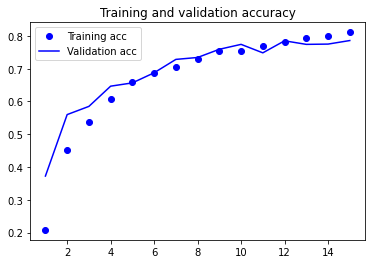

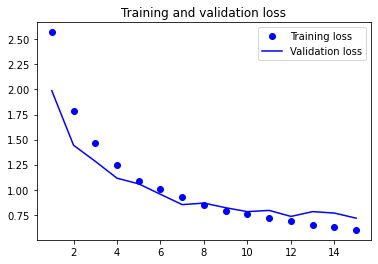

In [16]:
acc = history1_lenet.history['accuracy']
val_acc = history1_lenet.history['val_accuracy']
loss = history1_lenet.history['loss']
val_loss = history1_lenet.history['val_loss']


epochs = range(1,16)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [8]:
results1 = lenet5_model1.evaluate(test_fresh_f_and_v_generator, batch_size=64)

19/19 [==============================] - 3s 156ms/step - loss: 0.7437 - accuracy: 0.7833


### Just Fruit and Veggies classification

Epoch 1/15
150/150 [==============================] - 78s 518ms/step - loss: 2.0643 - accuracy: 0.2488 - val_loss: 1.8401 - val_accuracy: 0.3450
Epoch 2/15
150/150 [==============================] - 77s 511ms/step - loss: 1.6272 - accuracy: 0.4386 - val_loss: 1.4057 - val_accuracy: 0.5567
Epoch 3/15
150/150 [==============================] - 79s 524ms/step - loss: 1.3240 - accuracy: 0.5469 - val_loss: 1.2010 - val_accuracy: 0.5950
Epoch 4/15
150/150 [==============================] - 81s 538ms/step - loss: 1.1559 - accuracy: 0.6066 - val_loss: 1.1108 - val_accuracy: 0.6417
Epoch 5/15
150/150 [==============================] - 86s 573ms/step - loss: 1.0535 - accuracy: 0.6415 - val_loss: 1.0273 - val_accuracy: 0.6483
Epoch 6/15
150/150 [==============================] - 81s 537ms/step - loss: 0.9635 - accuracy: 0.6721 - val_loss: 0.9124 - val_accuracy: 0.7075
Epoch 7/15
150/150 [==============================] - 83s 551ms/step - loss: 0.8814 - accuracy: 0.6984 - val_loss: 0.8294 - val_ac

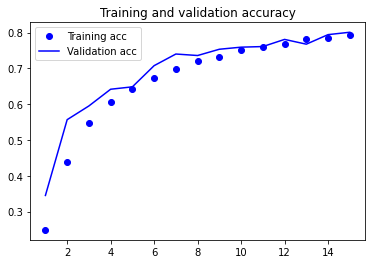

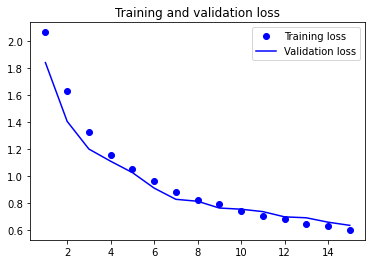

In [13]:
input_shape = (224, 224, 3)
num_classes = 10 # Number of classes for fruits and veggies
lenet5_model2 = create_lenet5_model(input_shape, num_classes)

lenet5_model2.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0005),
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

history2_lenet = lenet5_model2.fit(train_f_and_v_generator,
                           epochs=15,
                           batch_size=128,
                           validation_data=val_f_and_v_generator)

acc = history2_lenet.history['accuracy']
val_acc = history2_lenet.history['val_accuracy']
loss = history2_lenet.history['loss']
val_loss = history2_lenet.history['val_loss']


epochs = range(1,16)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [14]:
results2 = lenet5_model2.evaluate(test_f_and_v_generator, batch_size=64)

19/19 [==============================] - 2s 126ms/step - loss: 0.6230 - accuracy: 0.7883


### Just Freshness

Epoch 1/15
150/150 [==============================] - 108s 718ms/step - loss: 0.6452 - accuracy: 0.6187 - val_loss: 0.5817 - val_accuracy: 0.6908
Epoch 2/15
150/150 [==============================] - 78s 520ms/step - loss: 0.5609 - accuracy: 0.7074 - val_loss: 0.5792 - val_accuracy: 0.6783
Epoch 3/15
150/150 [==============================] - 77s 515ms/step - loss: 0.5122 - accuracy: 0.7433 - val_loss: 0.4585 - val_accuracy: 0.7700
Epoch 4/15
150/150 [==============================] - 77s 516ms/step - loss: 0.4688 - accuracy: 0.7725 - val_loss: 0.4530 - val_accuracy: 0.7825
Epoch 5/15
150/150 [==============================] - 77s 514ms/step - loss: 0.4516 - accuracy: 0.7867 - val_loss: 0.4309 - val_accuracy: 0.7883
Epoch 6/15
150/150 [==============================] - 78s 519ms/step - loss: 0.4212 - accuracy: 0.8071 - val_loss: 0.4030 - val_accuracy: 0.8075
Epoch 7/15
150/150 [==============================] - 79s 529ms/step - loss: 0.4033 - accuracy: 0.8170 - val_loss: 0.3661 - val_a

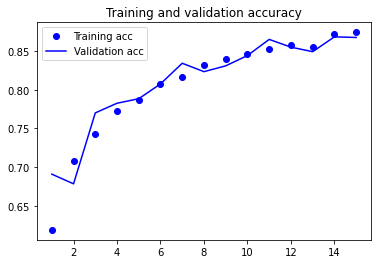

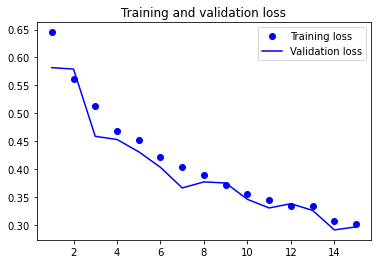

In [17]:
input_shape = (224, 224, 3)
num_classes = 2 # Number of classes for freshness
lenet5_model3 = create_lenet5_model(input_shape, num_classes)

lenet5_model3.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0005),
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

history3_lenet = lenet5_model3.fit(train_fresh_generator,
                           epochs=15,
                           batch_size=128,
                           validation_data=val_fresh_generator)

acc = history3_lenet.history['accuracy']
val_acc = history3_lenet.history['val_accuracy']
loss = history3_lenet.history['loss']
val_loss = history3_lenet.history['val_loss']


epochs = range(1,16)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [18]:
results3 = lenet5_model3.evaluate(test_fresh_generator, batch_size=64)

19/19 [==============================] - 3s 134ms/step - loss: 0.2932 - accuracy: 0.8833


In [23]:
from keras.utils.np_utils import to_categorical
y_pred_lenet1 = lenet5_model1.predict(test_fresh_f_and_v_generator)
prediction_lenet1 = np.argmax(y_pred_lenet1, axis=1)
prediction_lenet1 = label_encoder1.inverse_transform(prediction_lenet1)
print(*prediction_lenet1)


RottenCarrot RottenStrawberry FreshCarrot RottenOrange RottenApple FreshCarrot FreshTomato FreshCucumber RottenCucumber FreshStrawberry RottenApple RottenCucumber RottenStrawberry RottenStrawberry FreshBellpepper RottenCarrot FreshCucumber RottenTomato FreshOrange RottenStrawberry RottenCucumber RottenBellpepper FreshBellpepper FreshBellpepper RottenPotato RottenBanana RottenStrawberry RottenStrawberry FreshTomato FreshTomato RottenCucumber FreshPotato RottenOrange FreshStrawberry FreshStrawberry FreshCarrot RottenTomato RottenApple FreshApple FreshStrawberry FreshBellpepper FreshApple RottenStrawberry FreshOrange RottenStrawberry RottenOrange RottenStrawberry FreshBellpepper RottenStrawberry FreshCarrot RottenBellpepper FreshCarrot RottenStrawberry RottenStrawberry FreshStrawberry FreshCarrot FreshCucumber FreshOrange RottenBanana FreshOrange FreshTomato FreshOrange FreshCarrot FreshStrawberry RottenStrawberry RottenCarrot FreshCucumber FreshStrawberry RottenStrawberry FreshCarrot Rot

In [ ]:
y_pred_lenet2 = lenet5_model2.predict(test_f_and_v_generator)
prediction_lenet2 = np.argmax(y_pred_lenet2, axis=1)
prediction_lenet2 = label_encoder2.inverse_transform(prediction_lenet2)
print(*prediction_lenet2)

Potato Potato Bellpepper Strawberry Carrot Tomato Bellpepper Tomato Cucumber Potato Tomato Orange Orange Cucumber Cucumber Tomato Strawberry Tomato Strawberry Carrot Bellpepper Carrot Mango Apple Carrot Strawberry Cucumber Mango Potato Potato Mango Bellpepper Strawberry Potato Carrot Potato Cucumber Strawberry Orange Orange Mango Potato Carrot Carrot Carrot Mango Potato Potato Mango Strawberry Cucumber Potato Strawberry Strawberry Strawberry Strawberry Apple Strawberry Apple Bellpepper Carrot Carrot Orange Tomato Potato Apple Tomato Potato Bellpepper Strawberry Bellpepper Banana Mango Apple Cucumber Strawberry Potato Strawberry Potato Strawberry Orange Mango Carrot Mango Strawberry Orange Potato Apple Cucumber Strawberry Cucumber Apple Strawberry Apple Strawberry Cucumber Cucumber Cucumber Potato Potato Bellpepper Strawberry Strawberry Mango Orange Bellpepper Cucumber Cucumber Bellpepper Orange Strawberry Apple Cucumber Bellpepper Cucumber Banana Strawberry Apple Strawberry Mango Mango

In [ ]:
y_pred_lenet3 = lenet5_model3.predict(test_fresh_generator)
prediction_lenet3 = np.argmax(y_pred_lenet3, axis=1)
prediction_lenet3 = label_encoder3.inverse_transform(prediction_lenet3)
print(*prediction_lenet3)

Fresh Rotten Rotten Fresh Rotten Rotten Rotten Fresh Rotten Fresh Rotten Fresh Fresh Rotten Rotten Fresh Fresh Rotten Fresh Fresh Rotten Fresh Fresh Rotten Fresh Fresh Fresh Rotten Fresh Rotten Rotten Rotten Fresh Rotten Fresh Fresh Rotten Rotten Rotten Fresh Fresh Fresh Rotten Fresh Fresh Rotten Rotten Rotten Rotten Fresh Rotten Fresh Fresh Fresh Rotten Rotten Fresh Fresh Fresh Rotten Fresh Fresh Rotten Rotten Rotten Fresh Rotten Rotten Rotten Fresh Rotten Rotten Fresh Rotten Fresh Rotten Fresh Fresh Rotten Rotten Fresh Rotten Fresh Rotten Rotten Rotten Fresh Fresh Rotten Fresh Rotten Fresh Rotten Rotten Fresh Fresh Rotten Rotten Rotten Rotten Rotten Fresh Rotten Fresh Fresh Rotten Rotten Fresh Fresh Rotten Rotten Rotten Fresh Rotten Fresh Rotten Rotten Rotten Rotten Rotten Fresh Fresh Rotten Fresh Rotten Rotten Rotten Fresh Fresh Rotten Fresh Fresh Rotten Fresh Fresh Fresh Rotten Rotten Rotten Rotten Fresh Rotten Rotten Fresh Fresh Fresh Rotten Fresh Rotten Rotten Rotten Fresh Fresh 

# VGG 16

In [19]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Input, GlobalAveragePooling2D
from tensorflow.keras.models import Model

def create_vgg16_model(input_shape, num_classes):
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

    model = Sequential()
    model.add(base_model)

    model.add(Dropout(0.1))
    model.add(GlobalAveragePooling2D())
    model.add(Dense(1024, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    for layer in base_model.layers:
        layer.trainable = False

    return model


### Both classifications

In [8]:
input_shape = (224, 224, 3)
num_classes = 20 # Number of classes for both
vgg16_model1 = create_vgg16_model(input_shape, num_classes)

vgg16_model1.compile(optimizer=keras.optimizers.Adam(learning_rate=0.00025),
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

history1_vgg16 = vgg16_model1.fit(train_fresh_f_and_v_generator,
                           epochs=15,
                           batch_size=64,
                           validation_data=val_fresh_f_and_v_generator)

results1_vgg16 = vgg16_model1.evaluate(test_fresh_f_and_v_generator, batch_size=64)

acc = history1_vgg16.history['accuracy']
val_acc = history1_vgg16.history['val_accuracy']
loss = history1_vgg16.history['loss']
val_loss = history1_vgg16.history['val_loss']


epochs = range(1,16)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


Epoch 1/2
150/150 [==============================] - 113s 690ms/step - loss: 1.7214 - accuracy: 0.5059 - val_loss: 1.0743 - val_accuracy: 0.6842
Epoch 2/2
19/19 [==============================] - 5s 252ms/step - loss: 0.7747 - accuracy: 0.7708


In [9]:
y_pred_vgg1 = vgg16_model1.predict(test_fresh_f_and_v_generator)
prediction_vgg1 = np.argmax(y_pred_vgg1, axis=1)
prediction_vgg1 = label_encoder1.inverse_transform(prediction_vgg1)
print(*prediction_vgg1)

RottenCarrot RottenCucumber RottenOrange FreshMango RottenCucumber FreshCucumber RottenBanana FreshApple FreshBellpepper FreshCarrot FreshStrawberry FreshBanana RottenCucumber FreshOrange RottenApple FreshOrange FreshTomato RottenOrange FreshApple FreshCarrot FreshCucumber FreshCarrot RottenTomato FreshCucumber RottenBanana RottenBanana FreshCucumber RottenTomato FreshBellpepper RottenBanana RottenOrange RottenApple RottenMango RottenOrange FreshStrawberry RottenBanana FreshMango RottenBanana RottenTomato RottenCucumber RottenTomato RottenApple RottenBanana FreshStrawberry FreshTomato FreshTomato FreshTomato RottenTomato FreshTomato FreshCucumber RottenBellpepper FreshStrawberry RottenStrawberry RottenMango FreshTomato FreshStrawberry RottenCucumber RottenTomato RottenPotato RottenPotato FreshMango FreshMango RottenPotato RottenBellpepper RottenCucumber FreshMango RottenStrawberry FreshMango FreshCarrot FreshMango FreshApple FreshStrawberry RottenCarrot RottenApple RottenCarrot RottenM

### Just Fruits/veggies

Epoch 1/15
150/150 [==============================] - 154s 985ms/step - loss: 1.1794 - accuracy: 0.6264 - val_loss: 0.7405 - val_accuracy: 0.7858
Epoch 2/15
150/150 [==============================] - 86s 575ms/step - loss: 0.6465 - accuracy: 0.8020 - val_loss: 0.5689 - val_accuracy: 0.8233
Epoch 3/15
150/150 [==============================] - 82s 546ms/step - loss: 0.5157 - accuracy: 0.8381 - val_loss: 0.4575 - val_accuracy: 0.8550
Epoch 4/15
150/150 [==============================] - 85s 566ms/step - loss: 0.4498 - accuracy: 0.8591 - val_loss: 0.4067 - val_accuracy: 0.8708
Epoch 5/15
150/150 [==============================] - 85s 566ms/step - loss: 0.3987 - accuracy: 0.8730 - val_loss: 0.3925 - val_accuracy: 0.8667
Epoch 6/15
150/150 [==============================] - 86s 572ms/step - loss: 0.3559 - accuracy: 0.8865 - val_loss: 0.3642 - val_accuracy: 0.8850
Epoch 7/15
150/150 [==============================] - 84s 557ms/step - loss: 0.3284 - accuracy: 0.8936 - val_loss: 0.3334 - val_a

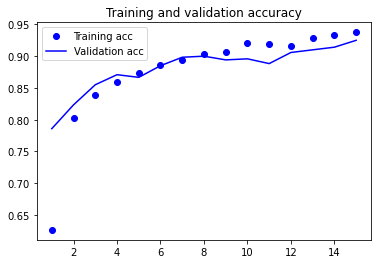

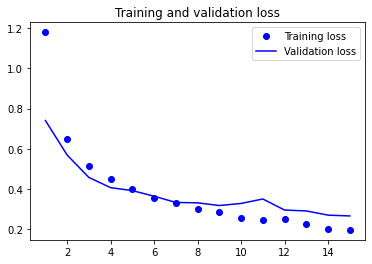

In [20]:
input_shape = (224, 224, 3)
num_classes = 10 # Number of classes for both
vgg16_model2 = create_vgg16_model(input_shape, num_classes)

vgg16_model2.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

history2_vgg16 = vgg16_model2.fit(train_f_and_v_generator,
                           epochs=15,
                           batch_size=64,
                           validation_data=val_f_and_v_generator)

results2_vgg16 = vgg16_model2.evaluate(test_f_and_v_generator, batch_size=64)

acc = history2_vgg16.history['accuracy']
val_acc = history2_vgg16.history['val_accuracy']
loss = history2_vgg16.history['loss']
val_loss = history2_vgg16.history['val_loss']


epochs = range(1,16)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [ ]:
y_pred_vgg2 = vgg16_model2.predict(test_f_and_v_generator)
prediction_vgg2 = np.argmax(y_pred_vgg2, axis=1)
prediction_vgg2 = label_encoder2.inverse_transform(prediction_vgg2)
print(*prediction_vgg2)

Orange Strawberry Bellpepper Bellpepper Cucumber Strawberry Carrot Mango Orange Banana Orange Mango Banana Carrot Mango Cucumber Banana Banana Apple Banana Mango Bellpepper Potato Bellpepper Carrot Cucumber Apple Carrot Orange Orange Mango Orange Carrot Bellpepper Carrot Tomato Bellpepper Potato Potato Banana Apple Potato Banana Orange Orange Carrot Cucumber Tomato Strawberry Potato Bellpepper Apple Bellpepper Cucumber Apple Orange Banana Bellpepper Carrot Potato Strawberry Mango Bellpepper Tomato Potato Tomato Carrot Carrot Tomato Banana Apple Carrot Banana Orange Apple Potato Carrot Apple Potato Mango Bellpepper Tomato Orange Strawberry Cucumber Tomato Potato Potato Bellpepper Orange Carrot Orange Banana Bellpepper Banana Tomato Banana Tomato Bellpepper Strawberry Tomato Strawberry Potato Orange Bellpepper Carrot Tomato Cucumber Potato Strawberry Banana Tomato Bellpepper Strawberry Potato Bellpepper Cucumber Tomato Apple Strawberry Cucumber Potato Cucumber Cucumber Banana Bellpepper 

### Just Freshness

Epoch 1/15
150/150 [==============================] - 148s 985ms/step - loss: 0.4204 - accuracy: 0.8000 - val_loss: 0.3235 - val_accuracy: 0.8658
Epoch 2/15
150/150 [==============================] - 129s 858ms/step - loss: 0.3124 - accuracy: 0.8674 - val_loss: 0.3149 - val_accuracy: 0.8433
Epoch 3/15
150/150 [==============================] - 81s 540ms/step - loss: 0.2752 - accuracy: 0.8814 - val_loss: 0.2367 - val_accuracy: 0.9117
Epoch 4/15
150/150 [==============================] - 80s 529ms/step - loss: 0.2393 - accuracy: 0.9007 - val_loss: 0.2124 - val_accuracy: 0.9242
Epoch 5/15
150/150 [==============================] - 80s 535ms/step - loss: 0.2119 - accuracy: 0.9160 - val_loss: 0.1984 - val_accuracy: 0.9342
Epoch 6/15
150/150 [==============================] - 80s 535ms/step - loss: 0.1935 - accuracy: 0.9217 - val_loss: 0.1972 - val_accuracy: 0.9217
Epoch 7/15
150/150 [==============================] - 80s 535ms/step - loss: 0.1929 - accuracy: 0.9185 - val_loss: 0.1927 - val_

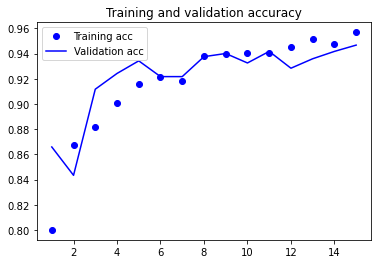

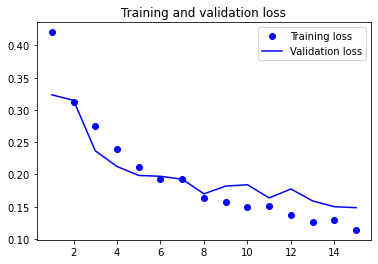

In [21]:
input_shape = (224, 224, 3)
num_classes = 2 # Number of classes for both
vgg16_model3 = create_vgg16_model(input_shape, num_classes)

vgg16_model3.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

history3_vgg16 = vgg16_model3.fit(train_fresh_generator,
                           epochs=15,
                           batch_size=64,
                           validation_data=val_fresh_generator)

results3_vgg16 = vgg16_model3.evaluate(test_fresh_generator, batch_size=64)

acc = history3_vgg16.history['accuracy']
val_acc = history3_vgg16.history['val_accuracy']
loss = history3_vgg16.history['loss']
val_loss = history3_vgg16.history['val_loss']


epochs = range(1,16)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [14]:
y_pred_vgg3 = vgg16_model3.predict(test_fresh_generator)
prediction_vgg3 = np.argmax(y_pred_vgg3, axis=1)
prediction_vgg3 = label_encoder3.inverse_transform(prediction_vgg3)
print(*prediction_vgg3)

Rotten Rotten Fresh Fresh Fresh Rotten Fresh Fresh Fresh Rotten Rotten Rotten Fresh Rotten Rotten Rotten Fresh Fresh Rotten Rotten Fresh Fresh Fresh Fresh Fresh Fresh Fresh Fresh Rotten Fresh Rotten Fresh Fresh Fresh Fresh Fresh Fresh Rotten Fresh Fresh Rotten Rotten Rotten Rotten Rotten Rotten Rotten Rotten Rotten Rotten Fresh Fresh Rotten Rotten Rotten Fresh Fresh Fresh Fresh Rotten Fresh Rotten Rotten Fresh Fresh Fresh Fresh Rotten Rotten Rotten Rotten Rotten Fresh Rotten Rotten Rotten Rotten Fresh Rotten Fresh Rotten Fresh Fresh Fresh Rotten Rotten Fresh Rotten Fresh Rotten Rotten Rotten Rotten Rotten Fresh Fresh Rotten Rotten Fresh Rotten Rotten Fresh Rotten Fresh Rotten Rotten Fresh Fresh Fresh Rotten Rotten Rotten Fresh Rotten Fresh Rotten Rotten Fresh Fresh Rotten Fresh Fresh Rotten Rotten Rotten Rotten Fresh Rotten Rotten Fresh Rotten Fresh Fresh Rotten Rotten Rotten Fresh Fresh Fresh Fresh Fresh Fresh Fresh Fresh Fresh Fresh Fresh Rotten Rotten Rotten Fresh Rotten Fresh Fresh

# AlexNet

In [23]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten

def create_alexnet_model(input_shape, num_classes):
    model = Sequential()

    # First Convolutional Layer
    model.add(Conv2D(96, (11, 11), strides=(4, 4), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
    model.add(tf.keras.layers.BatchNormalization())

    # Second Convolutional Layer
    model.add(Conv2D(256, (5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
    model.add(tf.keras.layers.BatchNormalization())

    # Third Convolutional Layer
    model.add(Conv2D(384, (3, 3), activation='relu'))

    # Fourth Convolutional Layer
    model.add(Conv2D(384, (3, 3), activation='relu'))

    # Fifth Convolutional Layer
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
    model.add(tf.keras.layers.BatchNormalization())

    # Flatten the feature maps
    model.add(Flatten())

    # Fully connected layers
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.2))

    # Output layer
    model.add(Dense(num_classes, activation='softmax'))

    return model


### Both Classifications

In [22]:
input_shape = (224, 224, 3)
num_classes = 20 # Number of classes for both
alexnet_model1 = create_alexnet_model(input_shape, num_classes)

alexnet_model1.compile(optimizer=keras.optimizers.Adam(learning_rate=0.00025),
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

history1_alexnet = alexnet_model1.fit(train_fresh_f_and_v_generator,
                           epochs=15,
                           batch_size=64,
                           validation_data=val_fresh_f_and_v_generator)

results1_alexnet = alexnet_model1.evaluate(test_fresh_f_and_v_generator, batch_size=64)

acc = history1_alexnet.history['accuracy']
val_acc = history1_alexnet.history['val_accuracy']
loss = history1_alexnet.history['loss']
val_loss = history1_alexnet.history['val_loss']


epochs = range(1,16)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


NameError: name 'train_fresh_f_and_v_generator' is not defined

In [17]:
y_pred_alexnet1 = alexnet_model1.predict(test_fresh_f_and_v_generator)
prediction_alexnet1 = np.argmax(y_pred_alexnet1, axis=1)
prediction_alexnet1 = label_encoder1.inverse_transform(prediction_alexnet1)
print(*prediction_alexnet1)

RottenCarrot RottenCucumber FreshCucumber FreshCucumber RottenMango RottenBellpepper FreshCucumber RottenPotato RottenCucumber FreshPotato RottenPotato FreshBanana RottenCarrot RottenCucumber FreshOrange RottenPotato RottenPotato RottenStrawberry RottenCarrot FreshTomato RottenPotato FreshOrange RottenCarrot RottenStrawberry RottenPotato RottenStrawberry FreshTomato RottenBanana RottenOrange RottenStrawberry RottenPotato RottenPotato RottenStrawberry RottenStrawberry RottenPotato FreshTomato RottenStrawberry RottenBanana RottenBellpepper RottenPotato RottenCarrot RottenBanana RottenCarrot RottenCarrot RottenPotato RottenPotato RottenOrange RottenStrawberry FreshBanana FreshCarrot RottenMango RottenMango RottenCarrot FreshBanana RottenPotato RottenBanana FreshTomato RottenPotato FreshBanana RottenStrawberry RottenPotato RottenStrawberry RottenPotato FreshCucumber FreshBanana FreshBellpepper RottenBellpepper RottenPotato RottenCucumber RottenStrawberry RottenPotato FreshTomato RottenPota

### Just type

Epoch 1/15
150/150 [==============================] - 151s 997ms/step - loss: 1.7144 - accuracy: 0.4014 - val_loss: 2.0954 - val_accuracy: 0.2733
Epoch 2/15
150/150 [==============================] - 76s 503ms/step - loss: 1.2304 - accuracy: 0.5596 - val_loss: 1.5332 - val_accuracy: 0.4842
Epoch 3/15
150/150 [==============================] - 76s 507ms/step - loss: 1.0410 - accuracy: 0.6359 - val_loss: 2.0002 - val_accuracy: 0.3775
Epoch 4/15
150/150 [==============================] - 76s 505ms/step - loss: 0.9219 - accuracy: 0.6823 - val_loss: 1.5611 - val_accuracy: 0.5683
Epoch 5/15
150/150 [==============================] - 75s 502ms/step - loss: 0.8002 - accuracy: 0.7234 - val_loss: 1.3170 - val_accuracy: 0.5600
Epoch 6/15
150/150 [==============================] - 75s 500ms/step - loss: 0.7293 - accuracy: 0.7465 - val_loss: 1.2816 - val_accuracy: 0.6442
Epoch 7/15
150/150 [==============================] - 76s 504ms/step - loss: 0.6725 - accuracy: 0.7699 - val_loss: 0.8030 - val_a

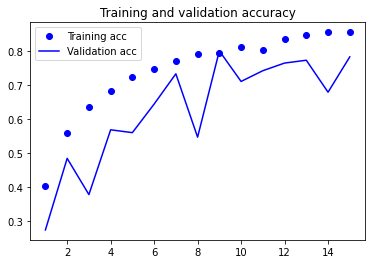

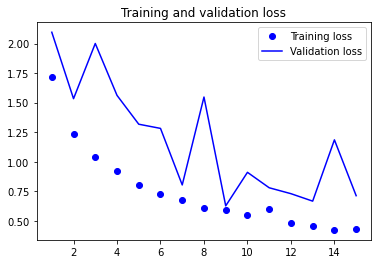

In [24]:
input_shape = (224, 224, 3)
num_classes = 10 # Number of classes for both
alexnet_model2 = create_alexnet_model(input_shape, num_classes)

alexnet_model2.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

history2_alexnet = alexnet_model2.fit(train_f_and_v_generator,
                           epochs=15,
                           batch_size=64,
                           validation_data=val_f_and_v_generator)

results2_alexnet = alexnet_model2.evaluate(test_f_and_v_generator, batch_size=64)

acc = history2_alexnet.history['accuracy']
val_acc = history2_alexnet.history['val_accuracy']
loss = history2_alexnet.history['loss']
val_loss = history2_alexnet.history['val_loss']


epochs = range(1,16)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [25]:
y_pred_alexnet2 = alexnet_model2.predict(test_f_and_v_generator)
prediction_alexnet2 = np.argmax(y_pred_alexnet2, axis=1)
prediction_alexnet2 = label_encoder2.inverse_transform(prediction_alexnet2)
print(*prediction_alexnet2)

Carrot Banana Banana Cucumber Orange Banana Banana Bellpepper Strawberry Cucumber Potato Strawberry Cucumber Orange Banana Apple Mango Cucumber Cucumber Carrot Banana Apple Banana Banana Orange Potato Banana Potato Orange Banana Mango Banana Cucumber Potato Potato Banana Bellpepper Cucumber Cucumber Mango Orange Potato Bellpepper Potato Mango Orange Apple Carrot Mango Carrot Bellpepper Strawberry Strawberry Banana Bellpepper Tomato Banana Apple Orange Bellpepper Apple Mango Apple Cucumber Orange Strawberry Carrot Bellpepper Banana Orange Apple Bellpepper Apple Banana Mango Orange Banana Apple Bellpepper Mango Bellpepper Tomato Mango Potato Cucumber Mango Mango Strawberry Carrot Carrot Mango Potato Carrot Mango Potato Orange Banana Carrot Carrot Cucumber Bellpepper Bellpepper Strawberry Orange Orange Mango Banana Strawberry Cucumber Mango Potato Mango Apple Cucumber Apple Mango Orange Strawberry Cucumber Bellpepper Potato Orange Orange Orange Cucumber Apple Potato Orange Mango Carrot Ap

### Just freshness

Epoch 1/15
150/150 [==============================] - 215s 1s/step - loss: 0.7000 - accuracy: 0.6298 - val_loss: 0.6787 - val_accuracy: 0.6108
Epoch 2/15
150/150 [==============================] - 79s 524ms/step - loss: 0.4961 - accuracy: 0.7659 - val_loss: 1.1118 - val_accuracy: 0.5808
Epoch 3/15
150/150 [==============================] - 76s 508ms/step - loss: 0.4403 - accuracy: 0.7968 - val_loss: 0.6410 - val_accuracy: 0.7567
Epoch 4/15
150/150 [==============================] - 77s 510ms/step - loss: 0.4157 - accuracy: 0.8123 - val_loss: 3.1540 - val_accuracy: 0.5325
Epoch 5/15
150/150 [==============================] - 76s 505ms/step - loss: 0.3840 - accuracy: 0.8307 - val_loss: 0.7132 - val_accuracy: 0.6733
Epoch 6/15
150/150 [==============================] - 75s 502ms/step - loss: 0.3755 - accuracy: 0.8385 - val_loss: 0.7922 - val_accuracy: 0.6708
Epoch 7/15
150/150 [==============================] - 75s 501ms/step - loss: 0.3446 - accuracy: 0.8529 - val_loss: 1.1842 - val_accu

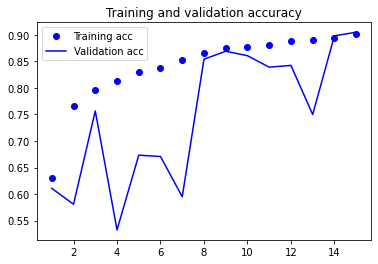

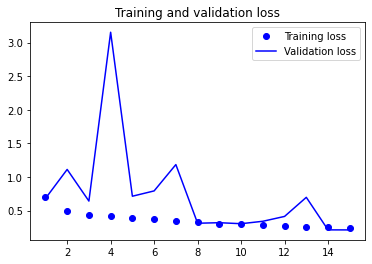

In [26]:
input_shape = (224, 224, 3)
num_classes = 2 # Number of classes for both
alexnet_model3 = create_alexnet_model(input_shape, num_classes)

alexnet_model3.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

history3_alexnet = alexnet_model3.fit(train_fresh_generator,
                           epochs=15,
                           batch_size=64,
                           validation_data=val_fresh_generator)

results3_alexnet = alexnet_model3.evaluate(test_fresh_generator, batch_size=64)

acc = history3_alexnet.history['accuracy']
val_acc = history3_alexnet.history['val_accuracy']
loss = history3_alexnet.history['loss']
val_loss = history3_alexnet.history['val_loss']


epochs = range(1,16)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [21]:
y_pred_alexnet3 = alexnet_model3.predict(test_fresh_generator)
prediction_alexnet3 = np.argmax(y_pred_alexnet3, axis=1)
prediction_alexnet3 = label_encoder3.inverse_transform(prediction_alexnet3)
print(*prediction_alexnet3)

Rotten Fresh Fresh Fresh Fresh Fresh Fresh Fresh Fresh Fresh Rotten Fresh Fresh Fresh Fresh Rotten Fresh Fresh Fresh Fresh Rotten Fresh Fresh Fresh Fresh Rotten Rotten Fresh Rotten Fresh Rotten Fresh Fresh Fresh Fresh Fresh Rotten Fresh Fresh Fresh Fresh Rotten Fresh Rotten Fresh Rotten Fresh Fresh Fresh Fresh Rotten Fresh Rotten Fresh Fresh Fresh Rotten Rotten Fresh Fresh Fresh Fresh Fresh Fresh Fresh Fresh Rotten Fresh Fresh Rotten Rotten Fresh Rotten Fresh Rotten Fresh Fresh Fresh Fresh Rotten Fresh Rotten Rotten Fresh Fresh Fresh Fresh Fresh Fresh Fresh Fresh Rotten Fresh Fresh Rotten Rotten Rotten Fresh Rotten Rotten Fresh Fresh Fresh Fresh Fresh Rotten Fresh Rotten Fresh Rotten Fresh Rotten Fresh Rotten Rotten Rotten Fresh Fresh Fresh Rotten Rotten Rotten Rotten Fresh Rotten Rotten Fresh Fresh Rotten Rotten Fresh Fresh Rotten Rotten Fresh Fresh Rotten Fresh Rotten Fresh Fresh Rotten Rotten Fresh Fresh Fresh Rotten Fresh Fresh Fresh Fresh Fresh Fresh Fresh Fresh Rotten Fresh Rotte

# InceptionResNetV2

In [28]:
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.layers import Input, GlobalAveragePooling2D
from tensorflow.keras.models import Model

def create_Resv2_model(input_shape, num_classes):
    base_model = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=input_shape)

    model = Sequential()
    model.add(base_model)

    model.add(GlobalAveragePooling2D())
    model.add(Dense(1024, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    for layer in base_model.layers:
        layer.trainable = False

    return model

### Both

In [ ]:
input_shape = (224, 224, 3)
num_classes = 20 # Number of classes for both
resv2_model1 = create_Resv2_model(input_shape, num_classes)

resv2_model1.compile(optimizer=keras.optimizers.Adam(learning_rate=0.00025),
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

history1_resv2 = resv2_model1.fit(train_fresh_f_and_v_generator,
                           epochs=15,
                           batch_size=64,
                           validation_data=val_fresh_f_and_v_generator)

results1_resv2 = resv2_model1.evaluate(test_fresh_f_and_v_generator, batch_size=64)
y_pred_resv21 = resv2_model1.predict(test_fresh_f_and_v_generator)

acc = history1_resv2.history['accuracy']
val_acc = history1_resv2.history['val_accuracy']
loss = history1_resv2.history['loss']
val_loss = history1_resv2.history['val_loss']


epochs = range(1,16)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

prediction_resv21 = np.argmax(y_pred_resv21, axis=1)
prediction_resv21 = label_encoder1.inverse_transform(prediction_resv21)
print(*prediction_resv21)


Epoch 1/2
150/150 [==============================] - 439s 3s/step - loss: 0.7297 - accuracy: 0.7701 - val_loss: 0.4739 - val_accuracy: 0.8458
Epoch 2/2
19/19 [==============================] - 104s 6s/step - loss: 0.3686 - accuracy: 0.8725
RottenOrange RottenOrange FreshStrawberry FreshBellpepper FreshCarrot RottenCarrot FreshBanana RottenApple RottenStrawberry RottenCarrot RottenPotato RottenCarrot FreshStrawberry FreshTomato RottenPotato RottenCucumber FreshStrawberry RottenTomato FreshTomato FreshTomato RottenPotato FreshCarrot FreshStrawberry RottenPotato RottenPotato FreshBellpepper FreshBellpepper RottenTomato RottenPotato RottenStrawberry FreshApple RottenPotato FreshCarrot FreshMango RottenOrange FreshMango RottenBellpepper RottenStrawberry RottenPotato FreshStrawberry RottenTomato RottenApple FreshApple FreshApple RottenOrange FreshStrawberry FreshCucumber RottenApple FreshCarrot FreshBellpepper FreshApple FreshBellpepper RottenOrange FreshPotato RottenBellpepper RottenApple F

### Just Type

Epoch 1/15
150/150 [==============================] - 95s 572ms/step - loss: 0.4184 - accuracy: 0.8629 - val_loss: 0.2592 - val_accuracy: 0.9175
Epoch 2/15
150/150 [==============================] - 82s 549ms/step - loss: 0.2285 - accuracy: 0.9271 - val_loss: 0.2261 - val_accuracy: 0.9267
Epoch 3/15
150/150 [==============================] - 82s 546ms/step - loss: 0.1709 - accuracy: 0.9445 - val_loss: 0.1955 - val_accuracy: 0.9400
Epoch 4/15
150/150 [==============================] - 82s 547ms/step - loss: 0.1510 - accuracy: 0.9498 - val_loss: 0.1808 - val_accuracy: 0.9425
Epoch 5/15
150/150 [==============================] - 81s 538ms/step - loss: 0.1269 - accuracy: 0.9577 - val_loss: 0.1825 - val_accuracy: 0.9542
Epoch 6/15
150/150 [==============================] - 81s 537ms/step - loss: 0.1072 - accuracy: 0.9641 - val_loss: 0.1545 - val_accuracy: 0.9575
Epoch 7/15
150/150 [==============================] - 80s 534ms/step - loss: 0.1026 - accuracy: 0.9663 - val_loss: 0.1576 - val_ac

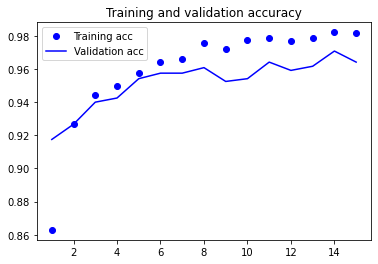

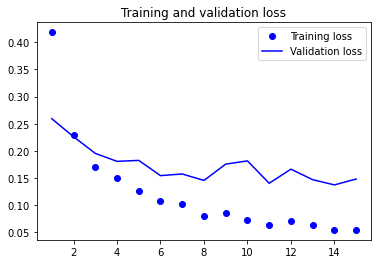

Tomato Carrot Cucumber Mango Bellpepper Strawberry Bellpepper Orange Potato Potato Strawberry Carrot Orange Potato Bellpepper Banana Bellpepper Carrot Potato Tomato Potato Potato Tomato Orange Tomato Carrot Carrot Strawberry Cucumber Carrot Banana Apple Tomato Cucumber Strawberry Carrot Carrot Tomato Banana Bellpepper Cucumber Cucumber Banana Apple Carrot Cucumber Cucumber Tomato Strawberry Banana Carrot Apple Banana Apple Potato Tomato Apple Bellpepper Apple Banana Tomato Bellpepper Bellpepper Carrot Apple Bellpepper Cucumber Bellpepper Apple Tomato Potato Mango Mango Potato Potato Bellpepper Carrot Tomato Carrot Bellpepper Banana Mango Orange Potato Carrot Tomato Cucumber Mango Orange Tomato Banana Mango Banana Orange Bellpepper Potato Mango Cucumber Orange Banana Cucumber Potato Strawberry Mango Banana Banana Orange Cucumber Apple Potato Mango Orange Banana Tomato Cucumber Strawberry Carrot Cucumber Carrot Carrot Strawberry Orange Cucumber Potato Bellpepper Banana Carrot Banana Cucu

In [30]:
input_shape = (224, 224, 3)
num_classes = 10 # Number of classes for both
resv2_model2 = create_Resv2_model(input_shape, num_classes)

resv2_model2.compile(optimizer=keras.optimizers.Adam(learning_rate=0.00025),
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

history2_resv2 = resv2_model2.fit(train_f_and_v_generator,
                           epochs=15,
                           batch_size=64,
                           validation_data=val_f_and_v_generator)

results2_resv2 = resv2_model2.evaluate(test_f_and_v_generator, batch_size=64)
y_pred_resv22 = resv2_model2.predict(test_f_and_v_generator)

acc = history2_resv2.history['accuracy']
val_acc = history2_resv2.history['val_accuracy']
loss = history2_resv2.history['loss']
val_loss = history2_resv2.history['val_loss']


epochs = range(1,16)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

prediction_resv22 = np.argmax(y_pred_resv22, axis=1)
prediction_resv22 = label_encoder2.inverse_transform(prediction_resv22)
print(*prediction_resv22)

### Just Freshness

Epoch 1/15
150/150 [==============================] - 490s 3s/step - loss: 0.3389 - accuracy: 0.8600 - val_loss: 0.2488 - val_accuracy: 0.9042
Epoch 2/15
150/150 [==============================] - 81s 542ms/step - loss: 0.1858 - accuracy: 0.9317 - val_loss: 0.1702 - val_accuracy: 0.9375
Epoch 3/15
150/150 [==============================] - 81s 539ms/step - loss: 0.1559 - accuracy: 0.9413 - val_loss: 0.1811 - val_accuracy: 0.9283
Epoch 4/15
150/150 [==============================] - 80s 531ms/step - loss: 0.1278 - accuracy: 0.9511 - val_loss: 0.1397 - val_accuracy: 0.9492
Epoch 5/15
150/150 [==============================] - 80s 531ms/step - loss: 0.1196 - accuracy: 0.9556 - val_loss: 0.2317 - val_accuracy: 0.9133
Epoch 6/15
150/150 [==============================] - 80s 533ms/step - loss: 0.1125 - accuracy: 0.9576 - val_loss: 0.1281 - val_accuracy: 0.9483
Epoch 7/15
150/150 [==============================] - 80s 531ms/step - loss: 0.0907 - accuracy: 0.9663 - val_loss: 0.1474 - val_accu

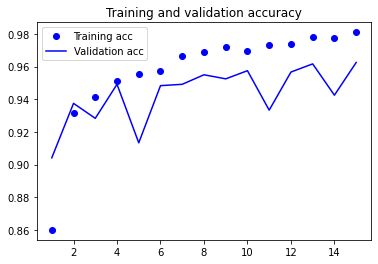

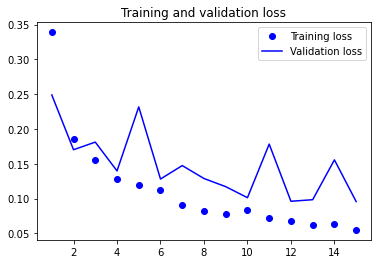

Rotten Rotten Rotten Fresh Rotten Rotten Rotten Rotten Fresh Rotten Rotten Rotten Fresh Fresh Rotten Rotten Fresh Rotten Rotten Fresh Fresh Fresh Fresh Fresh Fresh Fresh Rotten Rotten Fresh Fresh Rotten Rotten Rotten Rotten Fresh Fresh Rotten Fresh Rotten Rotten Rotten Fresh Fresh Rotten Rotten Rotten Fresh Fresh Fresh Rotten Fresh Fresh Fresh Rotten Rotten Rotten Fresh Rotten Rotten Fresh Rotten Rotten Rotten Rotten Fresh Fresh Rotten Rotten Rotten Fresh Fresh Fresh Fresh Fresh Rotten Rotten Fresh Fresh Fresh Rotten Rotten Rotten Rotten Fresh Rotten Rotten Fresh Fresh Rotten Rotten Fresh Rotten Rotten Fresh Rotten Fresh Rotten Rotten Rotten Rotten Rotten Fresh Rotten Fresh Rotten Rotten Rotten Fresh Rotten Rotten Rotten Fresh Fresh Fresh Rotten Fresh Rotten Fresh Fresh Fresh Fresh Rotten Rotten Fresh Fresh Rotten Rotten Rotten Rotten Rotten Rotten Fresh Fresh Fresh Fresh Fresh Rotten Fresh Rotten Fresh Fresh Rotten Fresh Fresh Fresh Fresh Fresh Rotten Fresh Rotten Rotten Fresh Fresh F

In [31]:
input_shape = (224, 224, 3)
num_classes = 2 # Number of classes for both
resv2_model3 = create_Resv2_model(input_shape, num_classes)

resv2_model3.compile(optimizer=keras.optimizers.Adam(learning_rate=0.00025),
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

history3_resv2 = resv2_model3.fit(train_fresh_generator,
                           epochs=15,
                           batch_size=64,
                           validation_data=val_fresh_generator)

results3_resv2 = resv2_model3.evaluate(test_fresh_generator, batch_size=64)
y_pred_resv23 = resv2_model3.predict(test_fresh_generator)

acc = history3_resv2.history['accuracy']
val_acc = history3_resv2.history['val_accuracy']
loss = history3_resv2.history['loss']
val_loss = history3_resv2.history['val_loss']


epochs = range(1,16)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

prediction_resv23 = np.argmax(y_pred_resv23, axis=1)
prediction_resv23 = label_encoder3.inverse_transform(prediction_resv23)
print(*prediction_resv23)

# Single CNN

In [ ]:
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.layers import Input, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
def create_SingleCnn_model(input_shape, num_classes):
    model = tf.keras.models.Sequential()

    # Convolutional layer
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flatten the feature maps
    model.add(Flatten())

    # Fully connected layers
    model.add(Dense(128, activation='relu'))

    # Output layer
    model.add(Dense(num_classes, activation='softmax'))

    return model

### Both

Epoch 1/15
150/150 [==============================] - 109s 658ms/step - loss: 5.4658 - accuracy: 0.1945 - val_loss: 2.3107 - val_accuracy: 0.3017
Epoch 2/15
150/150 [==============================] - 99s 661ms/step - loss: 1.9890 - accuracy: 0.4046 - val_loss: 1.6869 - val_accuracy: 0.5042
Epoch 3/15
150/150 [==============================] - 100s 669ms/step - loss: 1.6149 - accuracy: 0.5214 - val_loss: 1.4613 - val_accuracy: 0.5733
Epoch 4/15
150/150 [==============================] - 99s 658ms/step - loss: 1.3999 - accuracy: 0.5821 - val_loss: 1.2439 - val_accuracy: 0.6533
Epoch 5/15
150/150 [==============================] - 96s 639ms/step - loss: 1.2891 - accuracy: 0.6119 - val_loss: 1.1922 - val_accuracy: 0.6642
Epoch 6/15
150/150 [==============================] - 100s 666ms/step - loss: 1.2019 - accuracy: 0.6346 - val_loss: 1.1591 - val_accuracy: 0.6700
Epoch 7/15
150/150 [==============================] - 100s 665ms/step - loss: 1.1202 - accuracy: 0.6620 - val_loss: 1.0625 - va

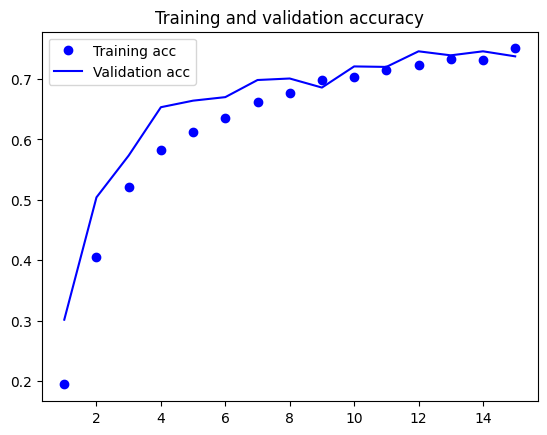

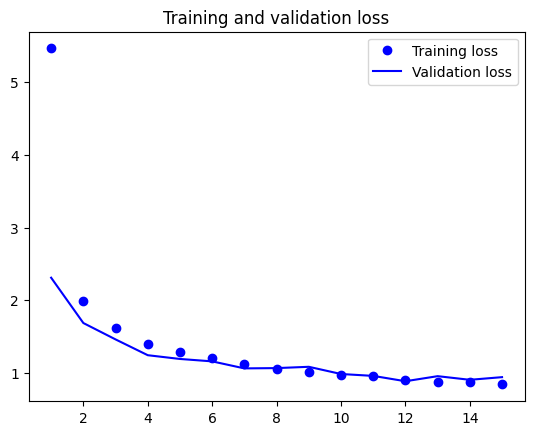

RottenBellpepper FreshMango FreshApple FreshCarrot RottenOrange RottenOrange RottenStrawberry RottenApple FreshCarrot FreshStrawberry RottenPotato FreshPotato FreshOrange FreshTomato FreshCarrot FreshMango FreshBellpepper FreshTomato FreshMango RottenCarrot RottenBanana FreshBanana FreshTomato RottenBellpepper RottenCucumber RottenApple RottenTomato FreshStrawberry FreshTomato RottenApple RottenStrawberry RottenBanana RottenCucumber FreshStrawberry RottenOrange FreshTomato FreshBanana RottenMango RottenOrange RottenCucumber FreshBanana FreshOrange RottenStrawberry RottenTomato RottenOrange FreshApple FreshBellpepper RottenBellpepper FreshOrange FreshBellpepper FreshApple FreshBanana RottenPotato RottenPotato FreshStrawberry FreshTomato FreshTomato RottenApple RottenBellpepper RottenPotato FreshApple RottenBanana FreshApple FreshTomato FreshStrawberry FreshBanana RottenStrawberry RottenPotato RottenTomato RottenPotato FreshApple RottenCucumber FreshTomato RottenApple FreshTomato FreshCa

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

input_shape = (224, 224, 3)
num_classes = 20 # Number of classes for both
SingleCnn_model1 = create_SingleCnn_model(input_shape, num_classes)

SingleCnn_model1.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

history1_SingleCnn = SingleCnn_model1.fit(train_fresh_f_and_v_generator,
                           epochs=15,
                           batch_size=64,
                           validation_data=val_fresh_f_and_v_generator)

results1_SingleCnn = SingleCnn_model1.evaluate(test_fresh_f_and_v_generator, batch_size=64)
y_pred_SingleCnn1 = SingleCnn_model1.predict(test_fresh_f_and_v_generator)

acc = history1_SingleCnn.history['accuracy']
val_acc = history1_SingleCnn.history['val_accuracy']
loss = history1_SingleCnn.history['loss']
val_loss = history1_SingleCnn.history['val_loss']


epochs = range(1,16)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

prediction_SingleCnn1 = np.argmax(y_pred_SingleCnn1, axis=1)
prediction_SingleCnn1 = label_encoder1.inverse_transform(prediction_SingleCnn1)
print(*prediction_SingleCnn1)


### Just Type

Epoch 1/15
150/150 [==============================] - 99s 587ms/step - loss: 6.2263 - accuracy: 0.2820 - val_loss: 1.7105 - val_accuracy: 0.4275
Epoch 2/15
150/150 [==============================] - 91s 608ms/step - loss: 1.5718 - accuracy: 0.4529 - val_loss: 1.3149 - val_accuracy: 0.5558
Epoch 3/15
150/150 [==============================] - 88s 585ms/step - loss: 1.2927 - accuracy: 0.5698 - val_loss: 1.0822 - val_accuracy: 0.6267
Epoch 4/15
150/150 [==============================] - 93s 617ms/step - loss: 1.1468 - accuracy: 0.6267 - val_loss: 0.9583 - val_accuracy: 0.6742
Epoch 5/15
150/150 [==============================] - 90s 601ms/step - loss: 1.0722 - accuracy: 0.6506 - val_loss: 0.8755 - val_accuracy: 0.7283
Epoch 6/15
150/150 [==============================] - 91s 605ms/step - loss: 0.9942 - accuracy: 0.6795 - val_loss: 0.8545 - val_accuracy: 0.7142
Epoch 7/15
150/150 [==============================] - 91s 606ms/step - loss: 0.9255 - accuracy: 0.7007 - val_loss: 0.8450 - val_ac

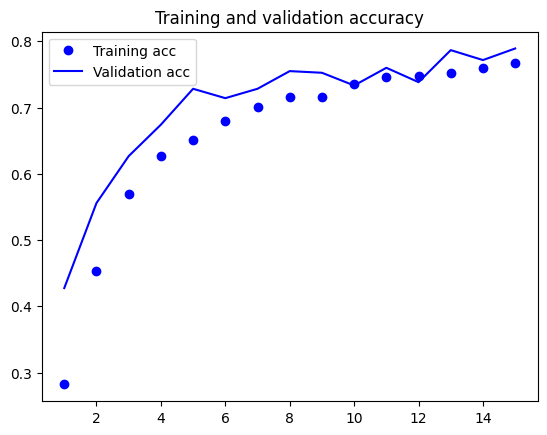

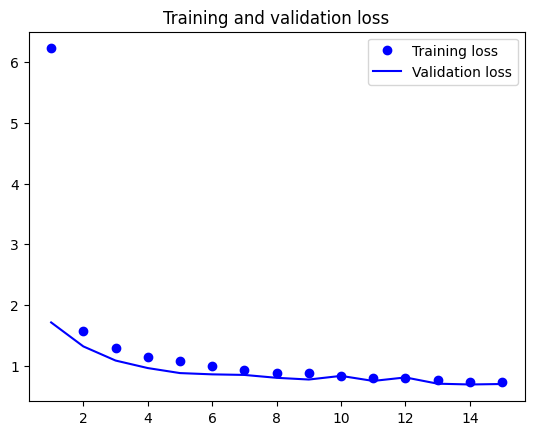

Mango Cucumber Mango Banana Banana Cucumber Potato Carrot Mango Banana Mango Tomato Bellpepper Cucumber Tomato Carrot Apple Apple Potato Carrot Carrot Cucumber Banana Mango Apple Cucumber Orange Banana Banana Tomato Banana Tomato Carrot Banana Tomato Carrot Strawberry Strawberry Mango Banana Bellpepper Cucumber Banana Bellpepper Potato Strawberry Potato Potato Mango Apple Apple Orange Apple Orange Orange Strawberry Tomato Mango Banana Carrot Orange Potato Banana Bellpepper Orange Carrot Banana Carrot Strawberry Potato Banana Apple Banana Carrot Tomato Tomato Cucumber Apple Bellpepper Bellpepper Strawberry Potato Tomato Strawberry Mango Strawberry Bellpepper Strawberry Orange Orange Tomato Tomato Potato Cucumber Orange Banana Cucumber Carrot Strawberry Potato Tomato Potato Apple Bellpepper Orange Tomato Tomato Apple Strawberry Carrot Apple Strawberry Cucumber Bellpepper Mango Orange Banana Bellpepper Apple Cucumber Tomato Carrot Bellpepper Carrot Orange Banana Carrot Banana Strawberry C

In [ ]:
input_shape = (224, 224, 3)
num_classes = 10 # Number of classes for both
SingleCnn_model2 = create_SingleCnn_model(input_shape, num_classes)

SingleCnn_model2.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

history2_SingleCnn = SingleCnn_model2.fit(train_f_and_v_generator,
                           epochs=15,
                           batch_size=64,
                           validation_data=val_f_and_v_generator)

results2_SingleCnn = SingleCnn_model2.evaluate(test_f_and_v_generator, batch_size=64)
y_pred_SingleCnn2 = SingleCnn_model2.predict(test_f_and_v_generator)

acc = history2_SingleCnn.history['accuracy']
val_acc = history2_SingleCnn.history['val_accuracy']
loss = history2_SingleCnn.history['loss']
val_loss = history2_SingleCnn.history['val_loss']


epochs = range(1,16)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

prediction_SingleCnn2 = np.argmax(y_pred_SingleCnn2, axis=1)
prediction_SingleCnn2 = label_encoder2.inverse_transform(prediction_SingleCnn2)
print(*prediction_SingleCnn2)

### Just Freshness

Epoch 1/15
150/150 [==============================] - 102s 611ms/step - loss: 1.8785 - accuracy: 0.6516 - val_loss: 0.5198 - val_accuracy: 0.7250
Epoch 2/15
150/150 [==============================] - 94s 625ms/step - loss: 0.5029 - accuracy: 0.7547 - val_loss: 0.4880 - val_accuracy: 0.7650
Epoch 3/15
150/150 [==============================] - 91s 605ms/step - loss: 0.4605 - accuracy: 0.7833 - val_loss: 0.4956 - val_accuracy: 0.7642
Epoch 4/15
150/150 [==============================] - 94s 623ms/step - loss: 0.4388 - accuracy: 0.7975 - val_loss: 0.4490 - val_accuracy: 0.7892
Epoch 5/15
150/150 [==============================] - 91s 607ms/step - loss: 0.4336 - accuracy: 0.7971 - val_loss: 0.4375 - val_accuracy: 0.8042
Epoch 6/15
150/150 [==============================] - 94s 625ms/step - loss: 0.4065 - accuracy: 0.8184 - val_loss: 0.4556 - val_accuracy: 0.8008
Epoch 7/15
150/150 [==============================] - 94s 623ms/step - loss: 0.4060 - accuracy: 0.8158 - val_loss: 0.4216 - val_a

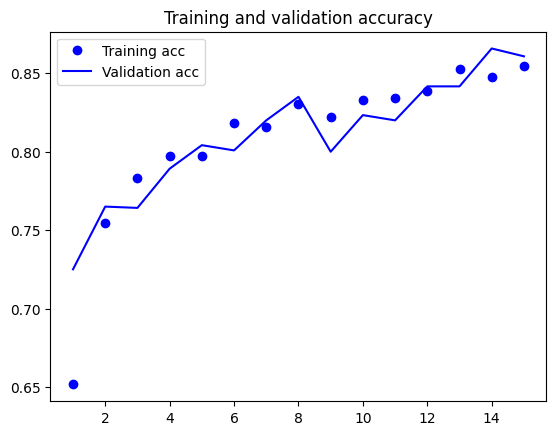

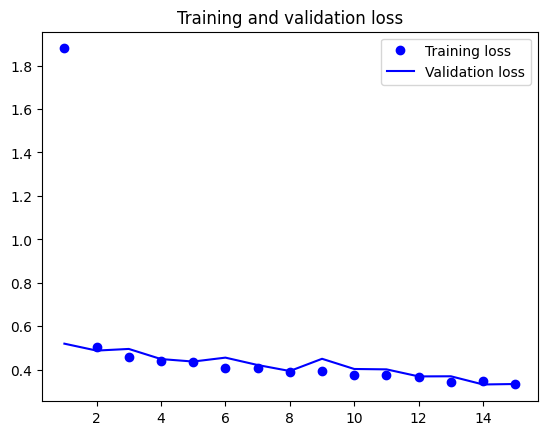

Fresh Rotten Rotten Rotten Fresh Rotten Rotten Fresh Rotten Rotten Rotten Rotten Fresh Fresh Rotten Fresh Rotten Fresh Fresh Rotten Fresh Fresh Fresh Rotten Rotten Fresh Fresh Rotten Rotten Fresh Fresh Fresh Fresh Fresh Fresh Fresh Fresh Rotten Fresh Fresh Rotten Rotten Rotten Fresh Rotten Fresh Fresh Rotten Fresh Rotten Rotten Rotten Rotten Rotten Fresh Rotten Rotten Fresh Rotten Fresh Fresh Fresh Fresh Rotten Rotten Rotten Rotten Rotten Fresh Rotten Rotten Fresh Rotten Fresh Fresh Rotten Fresh Fresh Fresh Rotten Fresh Fresh Rotten Fresh Rotten Fresh Rotten Rotten Rotten Fresh Rotten Fresh Rotten Fresh Fresh Fresh Rotten Rotten Fresh Fresh Rotten Rotten Rotten Rotten Rotten Fresh Fresh Fresh Fresh Fresh Fresh Rotten Rotten Rotten Rotten Fresh Fresh Rotten Rotten Fresh Rotten Fresh Rotten Rotten Fresh Rotten Fresh Fresh Rotten Fresh Rotten Fresh Rotten Fresh Rotten Fresh Rotten Fresh Fresh Fresh Fresh Fresh Rotten Rotten Rotten Fresh Fresh Fresh Fresh Fresh Rotten Rotten Fresh Rotten R

In [ ]:
input_shape = (224, 224, 3)
num_classes = 2 # Number of classes for both
SingleCnn_model3 = create_SingleCnn_model(input_shape, num_classes)

SingleCnn_model3.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

history3_SingleCnn = SingleCnn_model3.fit(train_fresh_generator,
                           epochs=15,
                           batch_size=64,
                           validation_data=val_fresh_generator)

results3_SingleCnn = SingleCnn_model3.evaluate(test_fresh_generator, batch_size=64)
y_pred_SingleCnn3 = SingleCnn_model3.predict(test_fresh_generator)

acc = history3_SingleCnn.history['accuracy']
val_acc = history3_SingleCnn.history['val_accuracy']
loss = history3_SingleCnn.history['loss']
val_loss = history3_SingleCnn.history['val_loss']


epochs = range(1,16)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

prediction_SingleCnn3 = np.argmax(y_pred_SingleCnn3, axis=1)
prediction_SingleCnn3 = label_encoder3.inverse_transform(prediction_SingleCnn3)
print(*prediction_SingleCnn3)